In [5]:
import numpy
import dlite_python

# Multi Agent Spatiotemporal Path Planning

<h3 style="font-family:times new roman"> Tutorial </h3>





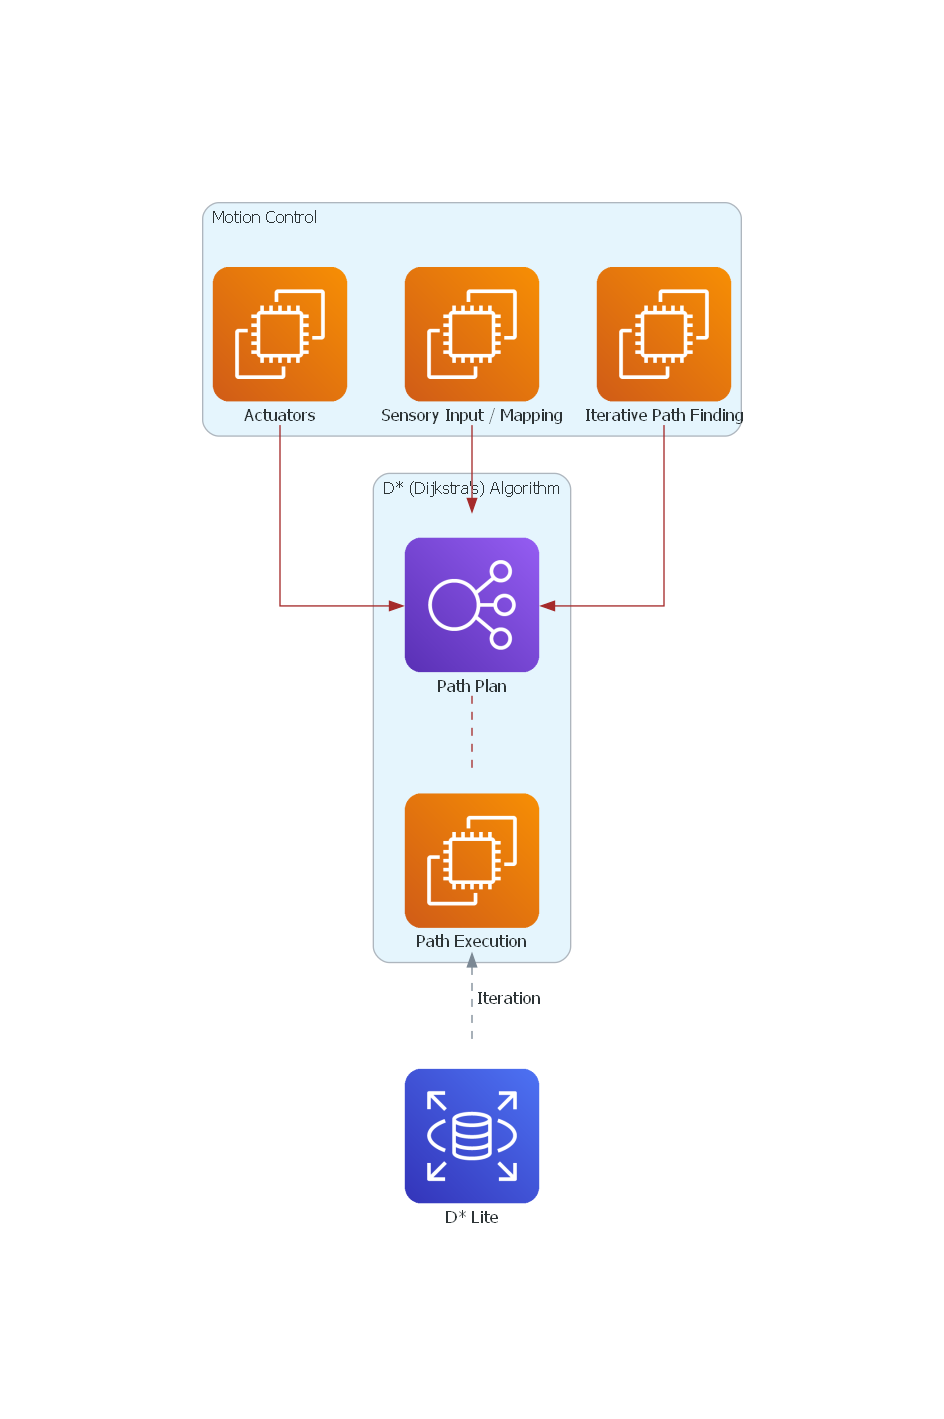

In [91]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.onprem.monitoring import Grafana, Prometheus

with Diagram("", show=False, direction="TB") as diag:
    dstarlite = RDS("D* Lite")

    with Cluster("Motion Control"):
        grpcsvc = [
            EC2("Actuators"),
            EC2("Sensory Input / Mapping"),
            EC2("Iterative Path Finding")]

    with Cluster("D* (Dijkstra's) Algorithm"):
            primary = ELB("Path Plan")
            primary - Edge(color="brown", style="dashed") - EC2("Path Execution") << Edge(style="dashed", label=" Iteration") << dstarlite
            grpcsvc >> Edge(color="brown") >> primary

diag

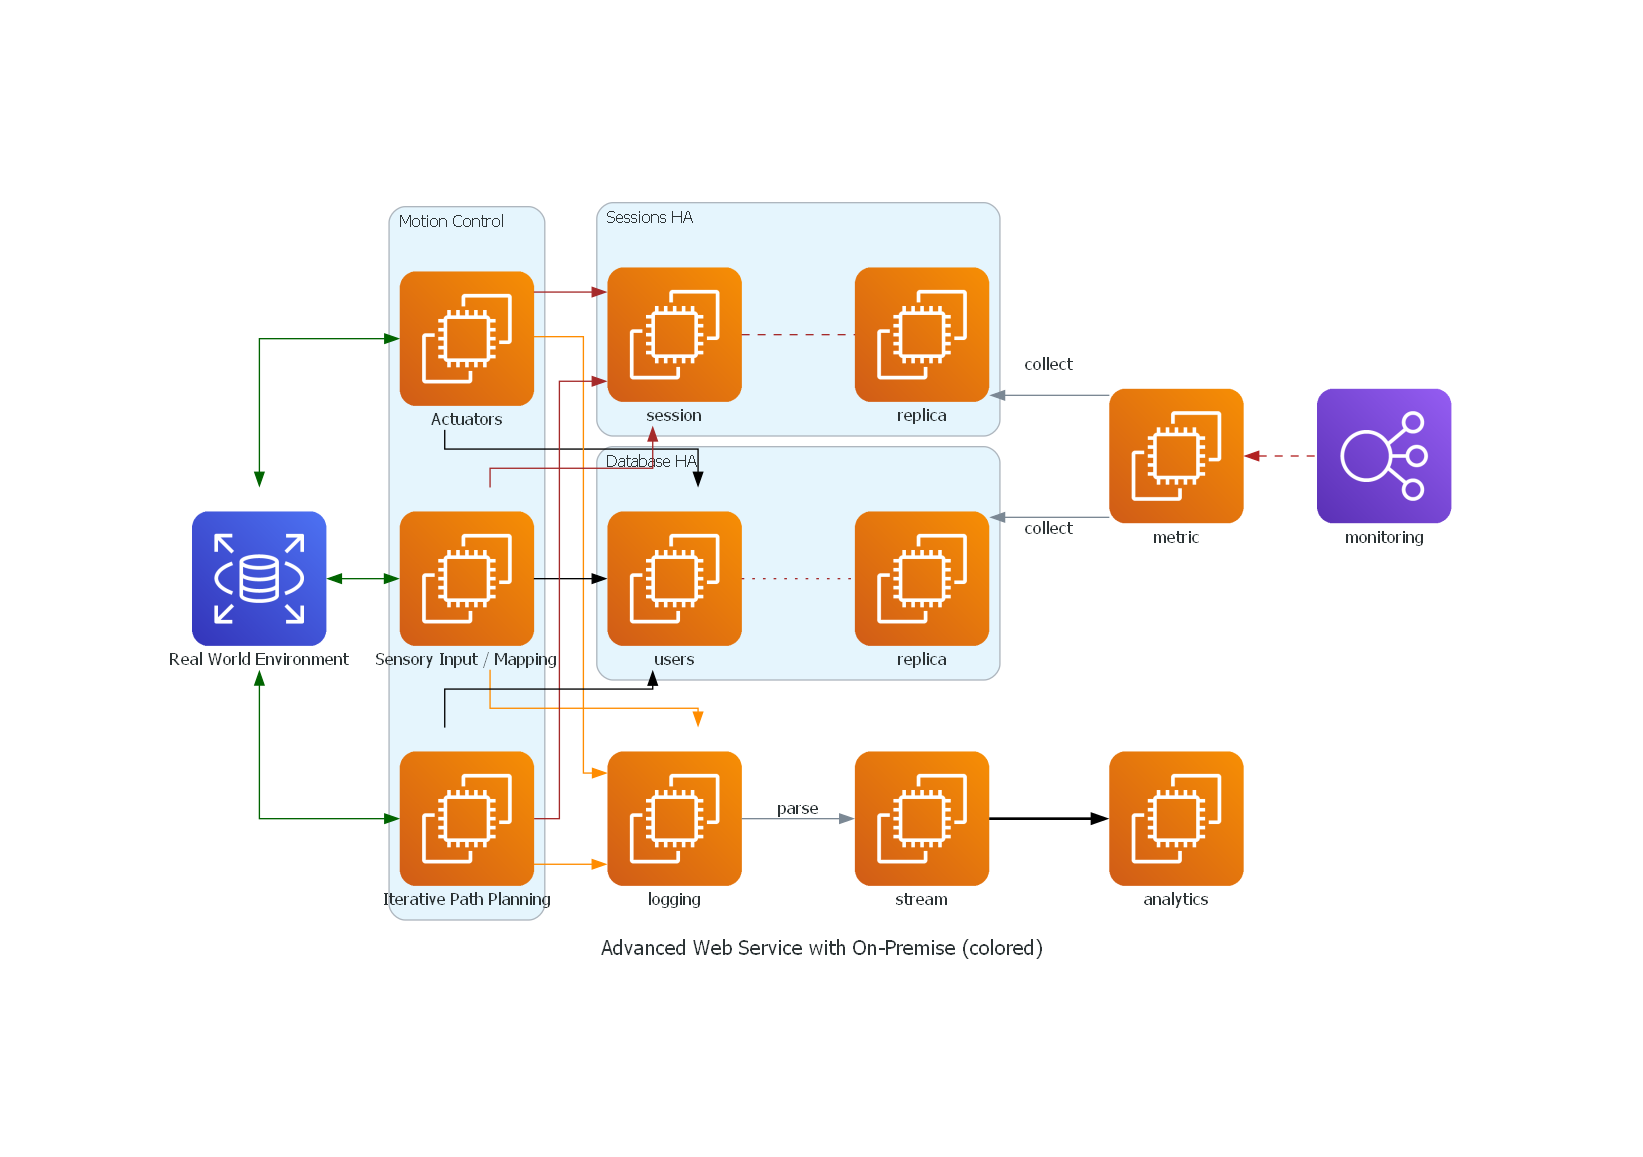

: 

In [9]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.onprem.monitoring import Grafana, Prometheus

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as diag:
    ingress = RDS("Real World Environment")

    metrics = EC2("metric")
    metrics << Edge(color="firebrick", style="dashed") << ELB("monitoring")

    with Cluster("Motion Control"):
        grpcsvc = [
            EC2("Actuators"),
            EC2("Sensory Input / Mapping"),
            EC2("Iterative Path Planning")]

    with Cluster("Sessions HA"):
        primary = EC2("session")
        primary - Edge(color="brown", style="dashed") - EC2("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = EC2("users")
        primary - Edge(color="brown", style="dotted") - EC2("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = EC2("logging")
    aggregator >> Edge(label="parse") >> EC2("stream") >> Edge(color="black", style="bold") >> EC2("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator

diag

In [3]:
import sys
sys.path.append('dstarlite\python\python\main.py')

import numpy as np
from IPython.display import display
from dstarlite import *